## **Comparación de Gradiente Descendente y Adam en una Función de Costo No Convexa**

En este ejercicio se compararán los optimizadores Gradiente Descendente (GD) y Adam en la minimización de una función de costo basada en una red neuronal de una sola neurona:
$$
z = w x + b
$$
Con función de activación tangente hiperbólica:

$$
\hat{y} = \tanh(z) = \tanh(w x + b)
$$

\\

Se analizará la trayectoria de aprendizaje de ambos algoritmos y se evaluará su eficiencia con diferentes tasas de aprendizaje (learning rate).

\\

La función de costo utilizada es el Error Cuadrático Medio (MSE):

$$
J(w, b) = \frac{1}{m} \sum_{i=1}^{m} (\hat{y}_i - y_i)^2
$$

$$
J(w, b) = \frac{1}{m} \sum_{i=1}^{m} ( \tanh(w x_i + b) - y_i )^2
$$

donde \\( w \\) y \\( b \\) son los parámetros a optimizar.

\\

Si bien es cierto, en estos experimentos estamos comparando optimizadores (GD vs Adam), y no entrenando un modelo como tal, de igual forma se necesitará una especie de dataset. Este será sintético y solo de prueba, por ende tendrán cierta libertad para elegir sus valores. Sin embargo deberán tomar en cuenta que cumpla la siguiente estructura:

`x = np.linspace(ini, fin, n)`

donde `x` es un array de una sola dimensión y con `n` cantidad de valores. Y tiene un rango de valores desde `ini` hasta `fin`. Recomiendo que sea simétrico, es decir, los mismos valores solo que con el signo cambiado, por ejemplo `ini=-3, fin=3`.

\\

Y con un target `y`:

`y = funcion_no_lineal(x) + ruido`

donde `y` es también un vector de una sola dimensión de tamaño `n` que sigue un patrón no lineal (elegido por ustedes) con respecto a `x` adicionando un ruido que puede ser creado con algunas de las funciones del paquete `np.random`.


# **PREGUNTA 1**

### 1a) Implementación del Gradiente Descendente (1 punto)
- Implementar el algoritmo del Gradiente Descendente (GD) para minimizar \\( J(w, b) \\).
- Utilizar 100 épocas y 3 diferentes learning rates `(0.1, 0.01, 0.001)`.
- Inicializar valores de \\( w \\) y \\( b \\) de manera aleatoria con `np.random.randn()` para cada learning rate.
- Graficar la función de Costo \\( J(w, b) \\) VS número de época

\\

El optimizador del Gradiente Descendente se debe implementar haciendo el código desde cero y paso a paso. Se pueden usar librerías como `numpy`, `scipy`, `matplotlib` o similares. Pero no está permitido usar Pytorch ni TensorFlow o frameworks que ya contengan el optimizador desarrollado.

### 1b) Implementación de Adam (1 punto)  
- Implementar el algoritmo de Adam para minimizar \\( J(w, b) \\).  
- Utilizar 100 épocas y 3 diferentes learning rates `(0.1, 0.01, 0.001)`.
- Utilizar los mismos valores de \\( w \\) y \\( b \\) que se usaron para GD para cada diferente learning rate.
- Graficar la función de Costo \\( J(w, b) \\) VS número de época
- Hacer 2 modelos, uno sin mini-batch (full-batch) y otro con mini-batch (batch size a elección de ustedes).

\\

Al igual que para GD, el optimizador Adam también se debe implementar desde cero y paso a paso. Se pueden usar librerías como `numpy`, `scipy`, `matplotlib` o similares. Pero no está permitido usar Pytorch ni TensorFlow o frameworks que ya contengan el optimizador desarrollado.

### 1c) Comparativa de optimizadores (0.5 puntos)  
- Comparar el resultado y rendimiento de GD VS Adam (full-batch) VS Adam (mini-batch) para cada uno de los learning rates.
- Redactar conclusiones analíticas que resalten las diferencias entre cada optimizador.

### 1d) Visualización en 3D de la trayectoria de aprendizaje (0.5 puntos)
- Graficar en 3D la trayectoria del aprendizaje de los 3 optimizadores sobre la superficie de la función de costo \\( J(w, b) \\). Se debe elegir un solo learning rate.
- Comparar y redactar cómo se mueven en el espacio de parámetros y qué diferencias existen en la convergencia.
- Recomiendo utilizar `mpl_toolkits.mplot3d` y `np.meshgrid`, pero queda a su criterio la elección de funciones a usar para lograr el gráfico.

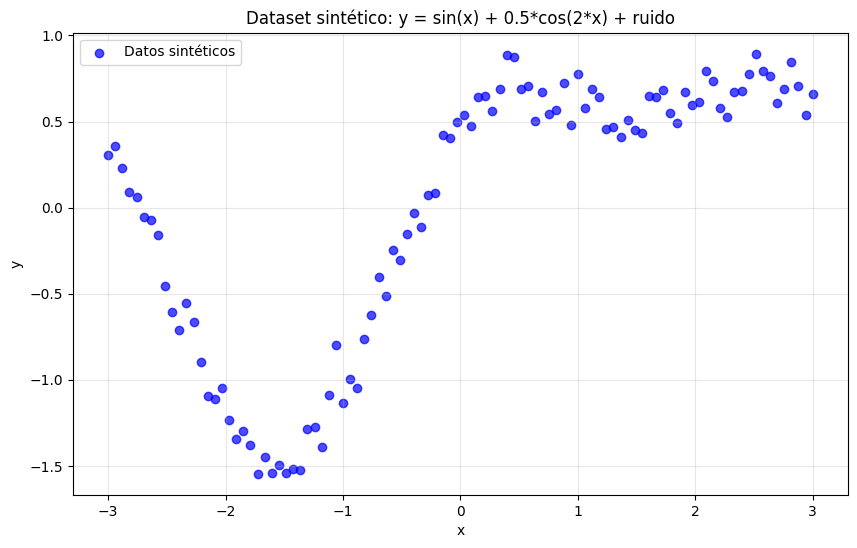

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# set random seed for reproducibility
np.random.seed(32)

# dataset creation
n = 100
ini, fin = -3, 3
x = np.linspace(ini, fin, n)

# ground truth function with noise
y = np.sin(x) + 0.5 * np.cos(2*x) + 0.1 * np.random.randn(n)


# plot the synthetic dataset
plt.figure(figsize=(10, 6))
plt.scatter(x, y, alpha=0.7, color='blue', label='Datos sintéticos')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Dataset sintético: y = sin(x) + 0.5*cos(2*x) + ruido')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

# define the neural network functions
def tanh_activation(z):
    """Tangent hyperbolic activation function"""
    return np.tanh(z)

def forward_pass(x, w, b):
    """Forward pass: compute predictions"""
    z = w * x + b
    y_hat = tanh_activation(z)
    return y_hat

def compute_cost(x, y, w, b):
    """Compute MSE cost function"""
    y_hat = forward_pass(x, w, b)
    cost = np.mean((y_hat - y)**2)
    return cost

def compute_gradients(x, y, w, b):
    """
    Compute gradients for w and b using backpropagation
    
    DESARROLLO de las derivadas del backpropagation:
    Variables intermedias:
    z_i = w * x_i + b
    y_hat_i = tanh(z_i)
    J(w,b) = (1/m) * Σ(y_hat_i - y_i)^2
    
    Función de costo: J(w,b) 
    
    PASO 1: Derivada de J respecto a y_hat
    Para un valor de i particular:
    dJ/dy_hat = (2/m) * (y_hat - y)
    
    PASO 2: Derivada de y_hat respecto a z
    dy_hat/dz = 1 - y_hat^2  
    
    PASO 3: Derivada de z respecto a w
    dz/dw = x_i
    
    PASO 4: Derivada de z respecto a b
    dz/db = 1
    
    APLICANDO LA REGLA DE LA CADENA:
    ∂J/∂w = Σ_i (∂J/∂y_hat_i * ∂y_hat_i/∂z_i * ∂z_i/∂w)
    ∂J/∂b = Σ_i (∂J/∂y_hat_i * ∂y_hat_i/∂z_i * ∂z_i/∂b)

    """
    m = len(x)
    y_hat = forward_pass(x, w, b)
    
    
    # PASO 1
    dJ_dy_hat = 2 * (y_hat - y) / m
    
    # PASO 2
    dy_hat_dz = 1 - y_hat**2
    
    # PASO 3
    dz_dw = x
    dz_db = 1
    
    # PASO 4
    dw = np.sum(dJ_dy_hat * dy_hat_dz * dz_dw)
    db = np.sum(dJ_dy_hat * dy_hat_dz * dz_db)
    
    return dw, db

# 3. GD 
def gradient_descent(x, y, w_init, b_init, learning_rate, epochs):
    """Gradient Descent optimizer implementation"""
    w, b = w_init, b_init
    costs = []
    w_history = [w]
    b_history = [b]
    
    for epoch in range(epochs):
        # compute cost
        cost = compute_cost(x, y, w, b)
        costs.append(cost)
        
        # compute gradients
        dw, db = compute_gradients(x, y, w, b)
        
        # update parameters
        w = w - learning_rate * dw
        b = b - learning_rate * db
        
        # store parameter history
        w_history.append(w)
        b_history.append(b)
    
    return w, b, costs, w_history, b_history

# 4. adam optimizer implementation
def adam_optimizer(x, y, w_init, b_init, learning_rate, epochs, batch_size=None, 
                  beta1=0.9, beta2=0.999, epsilon=1e-8):
    """Adam optimizer implementation with optional mini-batch"""
    w, b = w_init, b_init
    
    # init params
    m_w, m_b = 0, 0  # first moment estimates
    v_w, v_b = 0, 0  # second moment estimates
    
    costs = []
    w_history = [w]
    b_history = [b]
    
    m = len(x)
    if batch_size is None:
        batch_size = m  # full batch
    
    for epoch in range(epochs):
        # shuffle data for mini-batch
        indices = np.random.permutation(m)
        epoch_cost = 0
        num_batches = 0
        
        for i in range(0, m, batch_size):
            batch_indices = indices[i:i+batch_size]
            x_batch = x[batch_indices]
            y_batch = y[batch_indices]
            
            # compute cost for this batch
            batch_cost = compute_cost(x_batch, y_batch, w, b)
            epoch_cost += batch_cost
            num_batches += 1
            
            # compute gradients for this batch
            dw, db = compute_gradients(x_batch, y_batch, w, b)
            
            # update biased first moment estimate
            m_w = beta1 * m_w + (1 - beta1) * dw
            m_b = beta1 * m_b + (1 - beta1) * db
            
            # update biased second raw moment estimate
            v_w = beta2 * v_w + (1 - beta2) * (dw ** 2)
            v_b = beta2 * v_b + (1 - beta2) * (db ** 2)
            
            # compute bias-corrected first moment estimate
            m_w_corrected = m_w / (1 - beta1 ** (epoch + 1))
            m_b_corrected = m_b / (1 - beta1 ** (epoch + 1))
            
            # compute bias-corrected second raw moment estimate
            v_w_corrected = v_w / (1 - beta2 ** (epoch + 1))
            v_b_corrected = v_b / (1 - beta2 ** (epoch + 1))
            
            # update params
            w = w - learning_rate * m_w_corrected / (np.sqrt(v_w_corrected) + epsilon)
            b = b - learning_rate * m_b_corrected / (np.sqrt(v_b_corrected) + epsilon)
        
        # average cost for the epoch
        avg_cost = epoch_cost / num_batches
        costs.append(avg_cost)
        
        # store params history
        w_history.append(w)
        b_history.append(b)
    
    return w, b, costs, w_history, b_history



Learning Rate: 0.1
Parámetros iniciales: w = -0.3489, b = 0.9837
Parámetros finales: w = 1.0106, b = 0.1466
Costo final: 0.207987

Learning Rate: 0.01
Parámetros iniciales: w = 0.5809, b = 0.0703
Parámetros finales: w = 0.6650, b = 0.0439
Costo final: 0.222007

Learning Rate: 0.001
Parámetros iniciales: w = 0.7775, b = 0.5820
Parámetros finales: w = 0.8039, b = 0.5492
Costo final: 0.286913


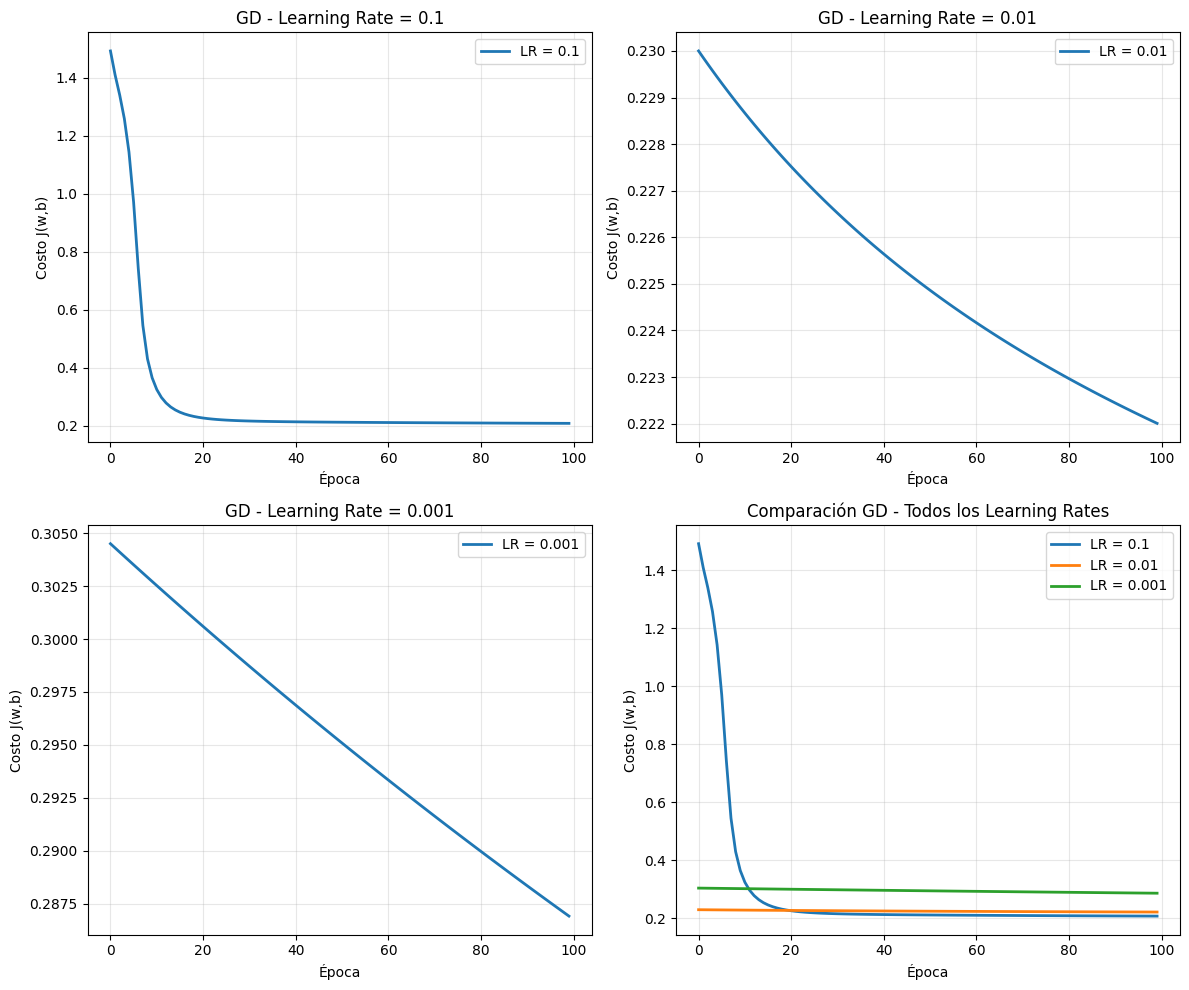

In [67]:
# 1a) IMPLEMENTACIÓN DEL GRADIENTE DESCENDENTE
# params
epochs = 100
learning_rates = [0.1, 0.01, 0.001]

# init random params for each lr
np.random.seed(32)
initial_params = {}
gd_results = {}

for lr in learning_rates:
    # init random w and b for this lr
    w_init = np.random.randn()
    b_init = np.random.randn()
    initial_params[lr] = (w_init, b_init)
    
    print(f"\nLearning Rate: {lr}")
    print(f"Parámetros iniciales: w = {w_init:.4f}, b = {b_init:.4f}")
    
    # Run GD
    w_final, b_final, costs, w_hist, b_hist = gradient_descent(
        x, y, w_init, b_init, lr, epochs
    )
    
    gd_results[lr] = {
        'w_final': w_final,
        'b_final': b_final,
        'costs': costs,
        'w_history': w_hist,
        'b_history': b_hist
    }
    
    print(f"Parámetros finales: w = {w_final:.4f}, b = {b_final:.4f}")
    print(f"Costo final: {costs[-1]:.6f}")

# plot cost function 
plt.figure(figsize=(12, 10))
for i, lr in enumerate(learning_rates):
    plt.subplot(2, 2, i+1)
    plt.plot(gd_results[lr]['costs'], label=f'LR = {lr}', linewidth=2)
    plt.xlabel('Época')
    plt.ylabel('Costo J(w,b)')
    plt.title(f'GD - Learning Rate = {lr}')
    plt.grid(True, alpha=0.3)
    plt.legend()

plt.subplot(2, 2, 4)
for lr in learning_rates:
    plt.plot(gd_results[lr]['costs'], label=f'LR = {lr}', linewidth=2)
plt.xlabel('Época')
plt.ylabel('Costo J(w,b)')
plt.title('Comparación GD - Todos los Learning Rates')
plt.grid(True, alpha=0.3)
plt.legend()
plt.tight_layout()
plt.show()


Learning Rate: 0.1
Adam Full-batch - Final: w = 1.5039, b = 0.3823, Costo = 0.200988
Adam Mini-batch - Final: w = 1.6691, b = 0.4547, Costo = 0.200641

Learning Rate: 0.01
Adam Full-batch - Final: w = 1.2346, b = 0.2585, Costo = 0.203490
Adam Mini-batch - Final: w = 1.4019, b = 0.3273, Costo = 0.201656

Learning Rate: 0.001
Adam Full-batch - Final: w = 0.8700, b = 0.4886, Costo = 0.256611
Adam Mini-batch - Final: w = 0.9629, b = 0.3712, Costo = 0.223044


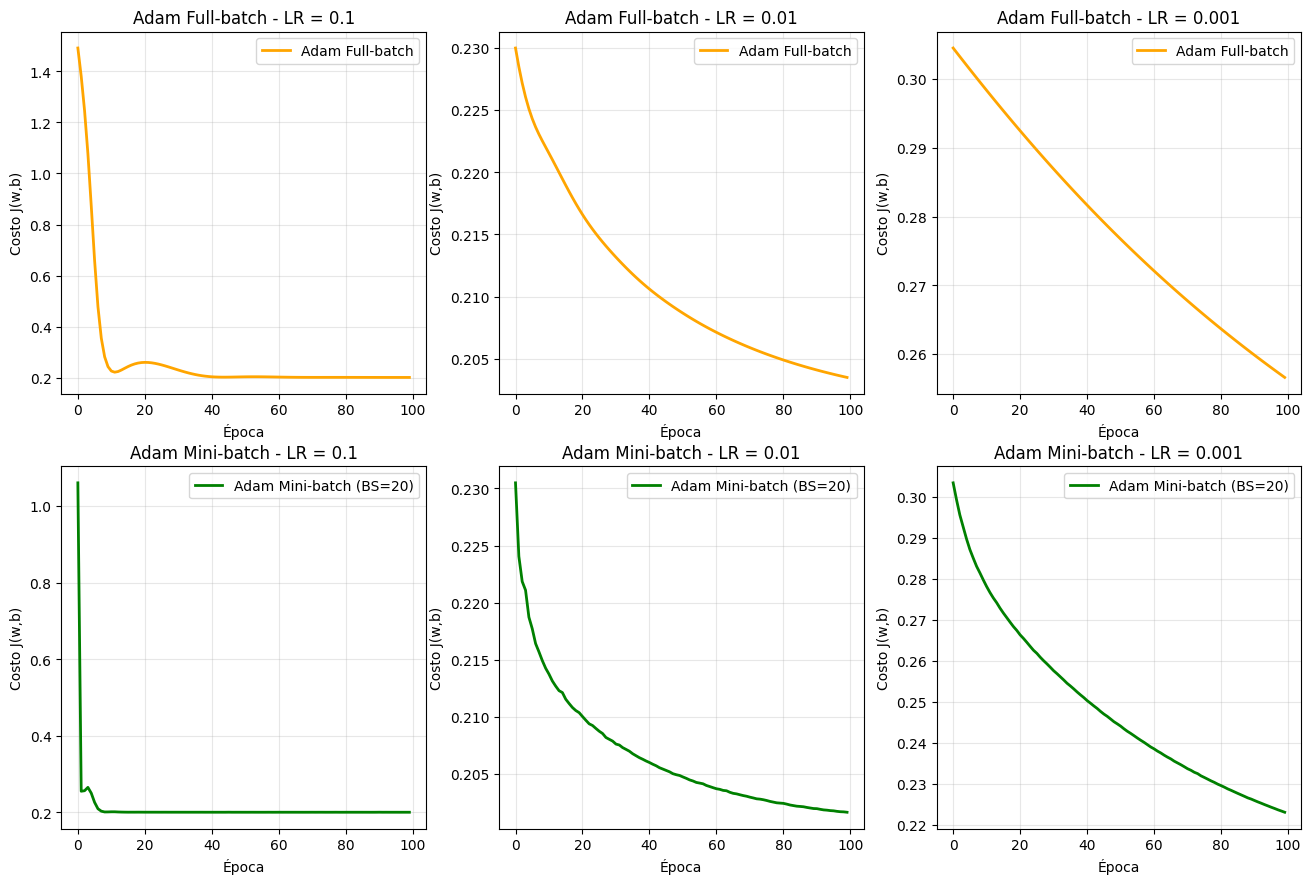

In [68]:
#1b) IMPLEMENTACIÓN DE ADAM
# adam Full-batch results
adam_full_results = {}
adam_mini_results = {}

# mini-batch size
batch_size = 20

for lr in learning_rates:
    # use same initial parameters as GD
    w_init, b_init = initial_params[lr]
    
    print(f"\nLearning Rate: {lr}")
    
    # adam complete batch 
    w_final_full, b_final_full, costs_full, w_hist_full, b_hist_full = adam_optimizer(
        x, y, w_init, b_init, lr, epochs, batch_size=None
    )
    
    adam_full_results[lr] = {
        'w_final': w_final_full,
        'b_final': b_final_full,
        'costs': costs_full,
        'w_history': w_hist_full,
        'b_history': b_hist_full
    }
    
    # adam mini batch
    w_final_mini, b_final_mini, costs_mini, w_hist_mini, b_hist_mini = adam_optimizer(
        x, y, w_init, b_init, lr, epochs, batch_size=batch_size
    )
    
    adam_mini_results[lr] = {
        'w_final': w_final_mini,
        'b_final': b_final_mini,
        'costs': costs_mini,
        'w_history': w_hist_mini,
        'b_history': b_hist_mini
    }
    
    print(f"Adam Full-batch - Final: w = {w_final_full:.4f}, b = {b_final_full:.4f}, Costo = {costs_full[-1]:.6f}")
    print(f"Adam Mini-batch - Final: w = {w_final_mini:.4f}, b = {b_final_mini:.4f}, Costo = {costs_mini[-1]:.6f}")

# Plot cost function evolution for Adam
plt.figure(figsize=(16, 16))

for i, lr in enumerate(learning_rates):
    # Full-batch Adam
    plt.subplot(3, 3, i+1)
    plt.plot(adam_full_results[lr]['costs'], label='Adam Full-batch', linewidth=2, color='orange')
    plt.xlabel('Época')
    plt.ylabel('Costo J(w,b)')
    plt.title(f'Adam Full-batch - LR = {lr}')
    plt.grid(True, alpha=0.3)
    plt.legend()
    
    # Mini-batch Adam
    plt.subplot(3, 3, i+4)
    plt.plot(adam_mini_results[lr]['costs'], label=f'Adam Mini-batch (BS={batch_size})', linewidth=2, color='green')
    plt.xlabel('Época')
    plt.ylabel('Costo J(w,b)')
    plt.title(f'Adam Mini-batch - LR = {lr}')
    plt.grid(True, alpha=0.3)
    plt.legend()

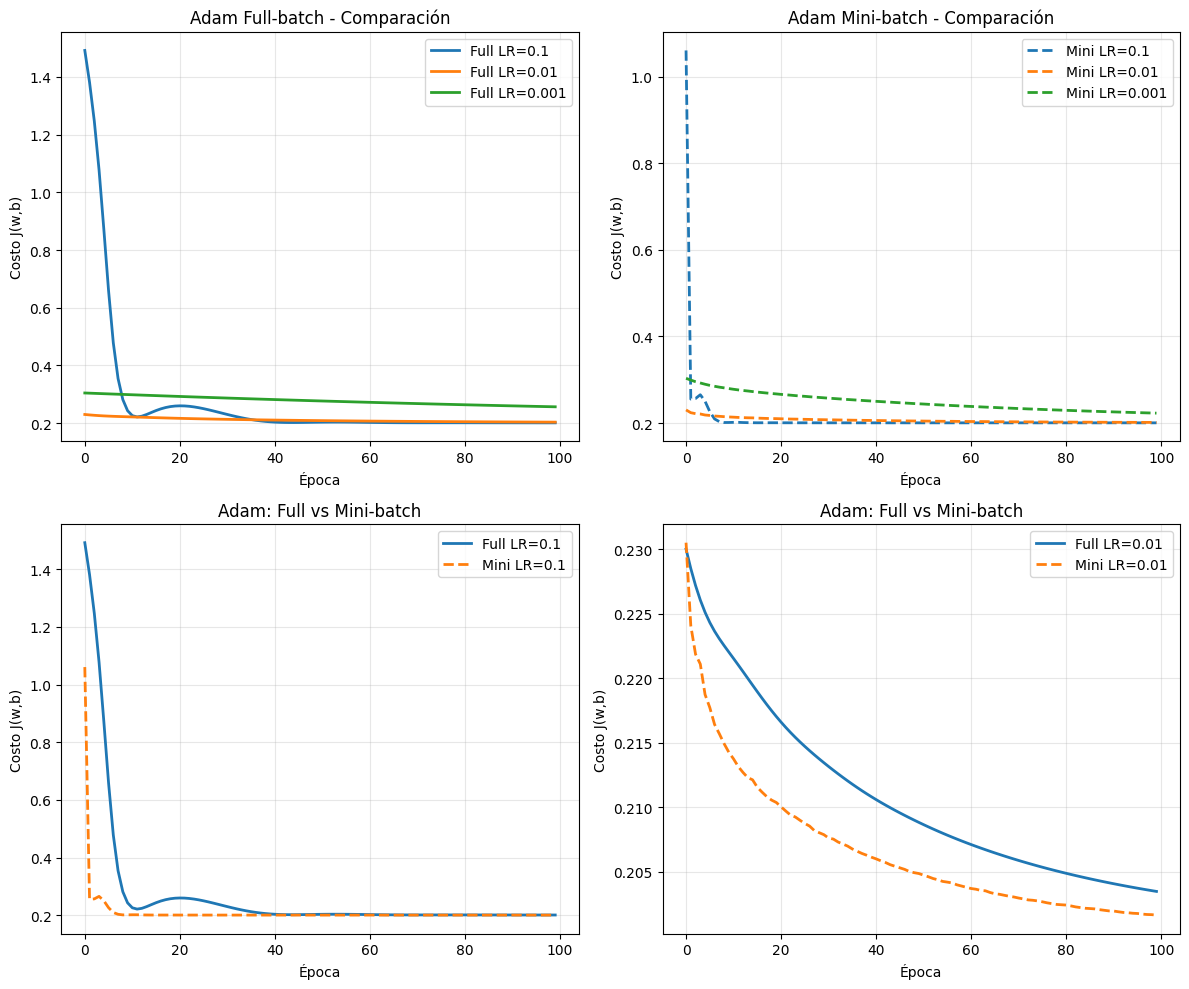

In [59]:
# Comparison plots
plt.figure(figsize=(12, 10))
plt.subplot(2, 2, 1)
for lr in learning_rates:
    plt.plot(adam_full_results[lr]['costs'], label=f'Full LR={lr}', linewidth=2, linestyle='-')
plt.xlabel('Época')
plt.ylabel('Costo J(w,b)')
plt.title('Adam Full-batch - Comparación')
plt.grid(True, alpha=0.3)
plt.legend()

plt.subplot(2, 2, 2)
for lr in learning_rates:
    plt.plot(adam_mini_results[lr]['costs'], label=f'Mini LR={lr}', linewidth=2, linestyle='--')
plt.xlabel('Época')
plt.ylabel('Costo J(w,b)')
plt.title('Adam Mini-batch - Comparación')
plt.grid(True, alpha=0.3)
plt.legend()

plt.subplot(2, 2, 3)

plt.plot(adam_full_results[0.1]['costs'], label=f'Full LR={0.1}', linewidth=2, linestyle='-')
plt.plot(adam_mini_results[0.1]['costs'], label=f'Mini LR={0.1}', linewidth=2, linestyle='--')
plt.xlabel('Época')
plt.ylabel('Costo J(w,b)')
plt.title('Adam: Full vs Mini-batch')
plt.grid(True, alpha=0.3)
plt.legend()

plt.tight_layout()
plt.subplot(2, 2, 4)

plt.plot(adam_full_results[0.01]['costs'], label=f'Full LR={0.01}', linewidth=2, linestyle='-')
plt.plot(adam_mini_results[0.01]['costs'], label=f'Mini LR={0.01}', linewidth=2, linestyle='--')
plt.xlabel('Época')
plt.ylabel('Costo J(w,b)')
plt.title('Adam: Full vs Mini-batch')
plt.grid(True, alpha=0.3)
plt.legend()

plt.tight_layout()
plt.show()


TABLA COMPARATIVA DE RESULTADOS FINALES
Learning Rate   Optimizer            w_final    b_final    Costo Final 
--------------------------------------------------------------------------------
0.1             GD                   1.0106     0.1466     0.207987    
                Adam Full-batch      1.5039     0.3823     0.200988    
                Adam Mini-batch      1.6691     0.4547     0.200641    
--------------------------------------------------------------------------------
0.01            GD                   0.6650     0.0439     0.222007    
                Adam Full-batch      1.2346     0.2585     0.203490    
                Adam Mini-batch      1.4019     0.3273     0.201656    
--------------------------------------------------------------------------------
0.001           GD                   0.8039     0.5492     0.286913    
                Adam Full-batch      0.8700     0.4886     0.256611    
                Adam Mini-batch      0.9629     0.3712     0.223044 

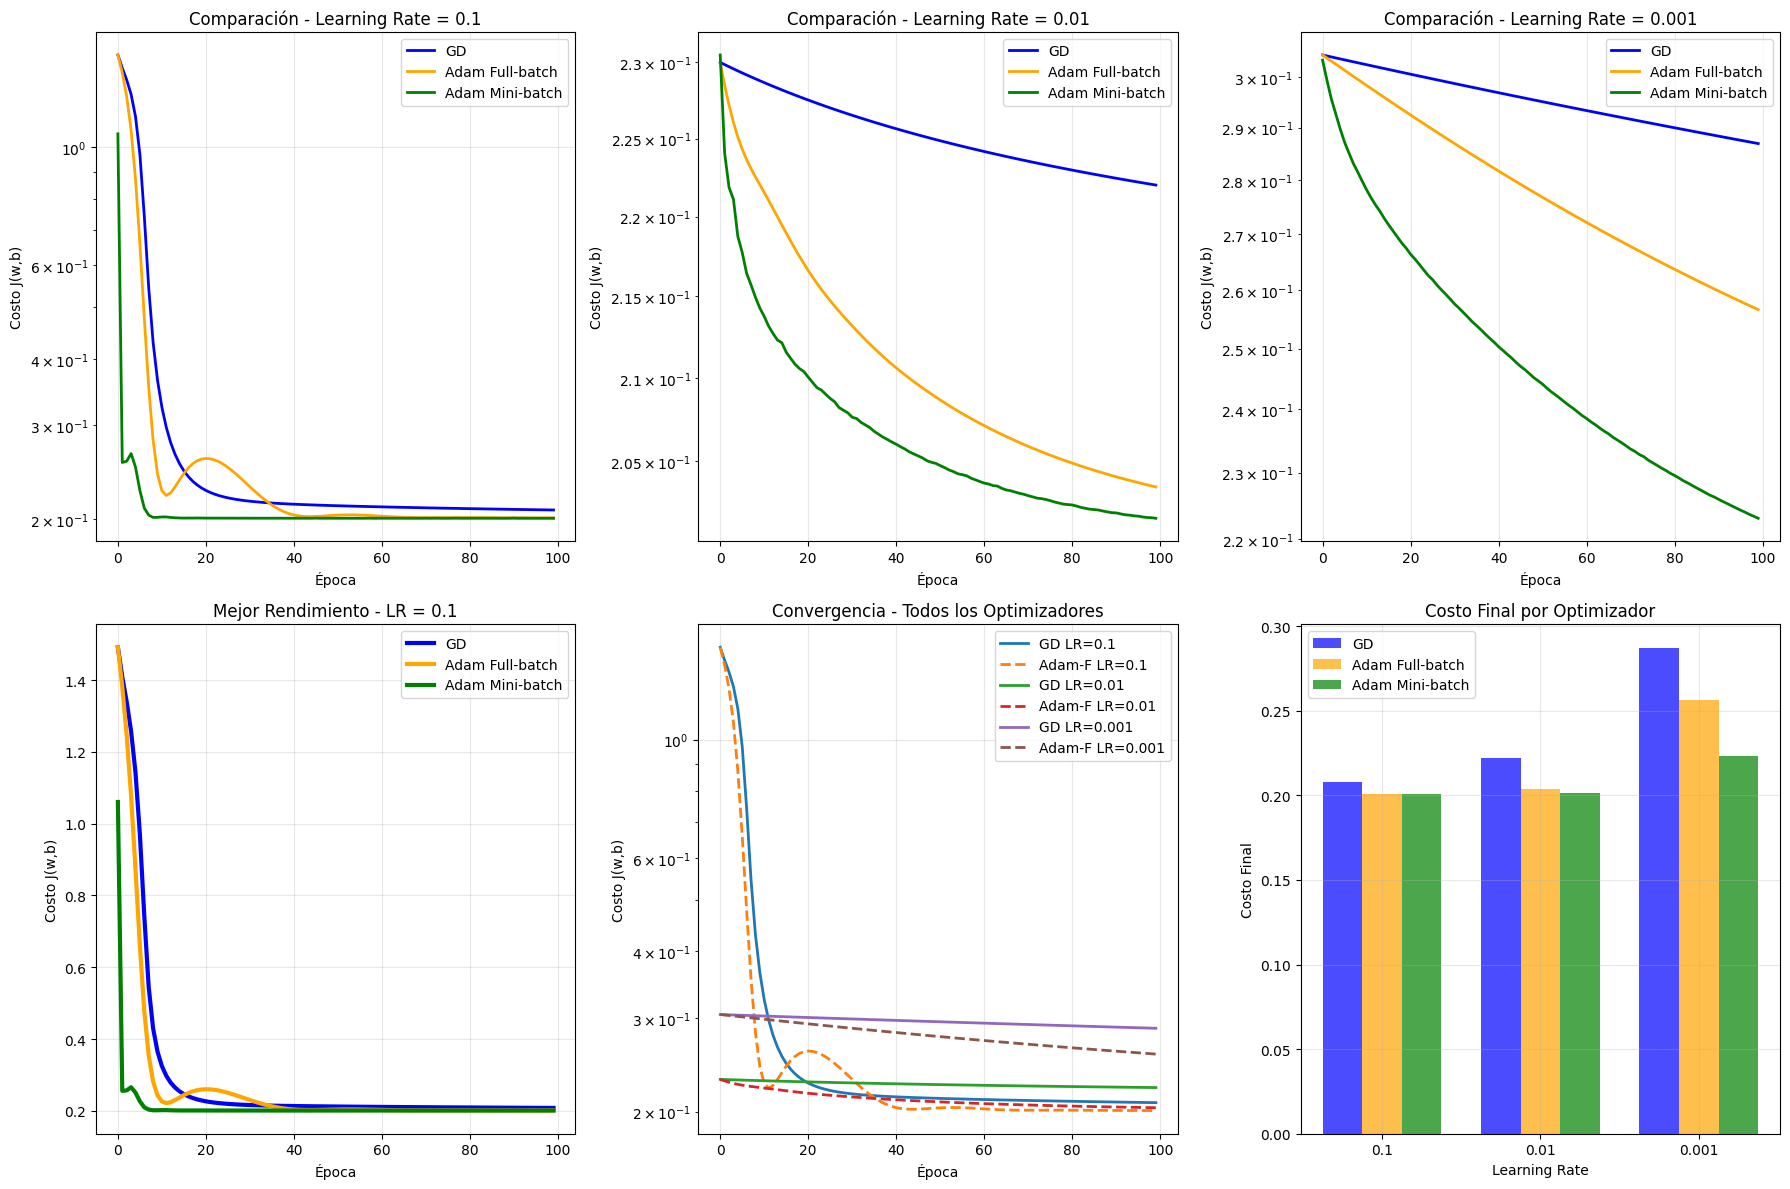

In [70]:
# 1c) COMPARATIVA DE OPTIMIZADORES

# comparison table
print("\n" + "="*80)
print("TABLA COMPARATIVA DE RESULTADOS FINALES")
print("="*80)
print(f"{'Learning Rate':<15} {'Optimizer':<20} {'w_final':<10} {'b_final':<10} {'Costo Final':<12}")
print("-"*80)

for lr in learning_rates:
    print(f"{lr:<15} {'GD':<20} {gd_results[lr]['w_final']:<10.4f} {gd_results[lr]['b_final']:<10.4f} {gd_results[lr]['costs'][-1]:<12.6f}")
    print(f"{'':<15} {'Adam Full-batch':<20} {adam_full_results[lr]['w_final']:<10.4f} {adam_full_results[lr]['b_final']:<10.4f} {adam_full_results[lr]['costs'][-1]:<12.6f}")
    print(f"{'':<15} {'Adam Mini-batch':<20} {adam_mini_results[lr]['w_final']:<10.4f} {adam_mini_results[lr]['b_final']:<10.4f} {adam_mini_results[lr]['costs'][-1]:<12.6f}")
    print("-"*80)

# Comprehensive comparison plots
plt.figure(figsize=(18, 12))

for i, lr in enumerate(learning_rates):
    plt.subplot(2, 3, i+1)
    plt.plot(gd_results[lr]['costs'], label='GD', linewidth=2, color='blue')
    plt.plot(adam_full_results[lr]['costs'], label='Adam Full-batch', linewidth=2, color='orange')
    plt.plot(adam_mini_results[lr]['costs'], label='Adam Mini-batch', linewidth=2, color='green')
    plt.xlabel('Época')
    plt.ylabel('Costo J(w,b)')
    plt.title(f'Comparación - Learning Rate = {lr}')
    plt.grid(True, alpha=0.3)
    plt.legend()
    plt.yscale('log')

# Best learning rate comparison
plt.subplot(2, 3, 4)
best_lr = 0.1
plt.plot(gd_results[best_lr]['costs'], label='GD', linewidth=3, color='blue')
plt.plot(adam_full_results[best_lr]['costs'], label='Adam Full-batch', linewidth=3, color='orange')
plt.plot(adam_mini_results[best_lr]['costs'], label='Adam Mini-batch', linewidth=3, color='green')
plt.xlabel('Época')
plt.ylabel('Costo J(w,b)')
plt.title(f'Mejor Rendimiento - LR = {best_lr}')
plt.grid(True, alpha=0.3)
plt.legend()

# Convergence comparison
plt.subplot(2, 3, 5)
for lr in learning_rates:
    epochs_to_plot = range(len(gd_results[lr]['costs']))
    plt.plot(epochs_to_plot, gd_results[lr]['costs'], 
             label=f'GD LR={lr}', linewidth=2, linestyle='-')
    plt.plot(epochs_to_plot, adam_full_results[lr]['costs'], 
             label=f'Adam-F LR={lr}', linewidth=2, linestyle='--')
plt.xlabel('Época')
plt.ylabel('Costo J(w,b)')
plt.title('Convergencia - Todos los Optimizadores')
plt.grid(True, alpha=0.3)
plt.legend()
plt.yscale('log')

# Final cost comparison
plt.subplot(2, 3, 6)
optimizers = ['GD', 'Adam Full', 'Adam Mini']
lr_labels = [str(lr) for lr in learning_rates]
x_pos = np.arange(len(learning_rates))

gd_final_costs = [gd_results[lr]['costs'][-1] for lr in learning_rates]
adam_full_final_costs = [adam_full_results[lr]['costs'][-1] for lr in learning_rates]
adam_mini_final_costs = [adam_mini_results[lr]['costs'][-1] for lr in learning_rates]

width = 0.25
plt.bar(x_pos - width, gd_final_costs, width, label='GD', color='blue', alpha=0.7)
plt.bar(x_pos, adam_full_final_costs, width, label='Adam Full-batch', color='orange', alpha=0.7)
plt.bar(x_pos + width, adam_mini_final_costs, width, label='Adam Mini-batch', color='green', alpha=0.7)

plt.xlabel('Learning Rate')
plt.ylabel('Costo Final')
plt.title('Costo Final por Optimizador')
plt.xticks(x_pos, lr_labels)
plt.legend()
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

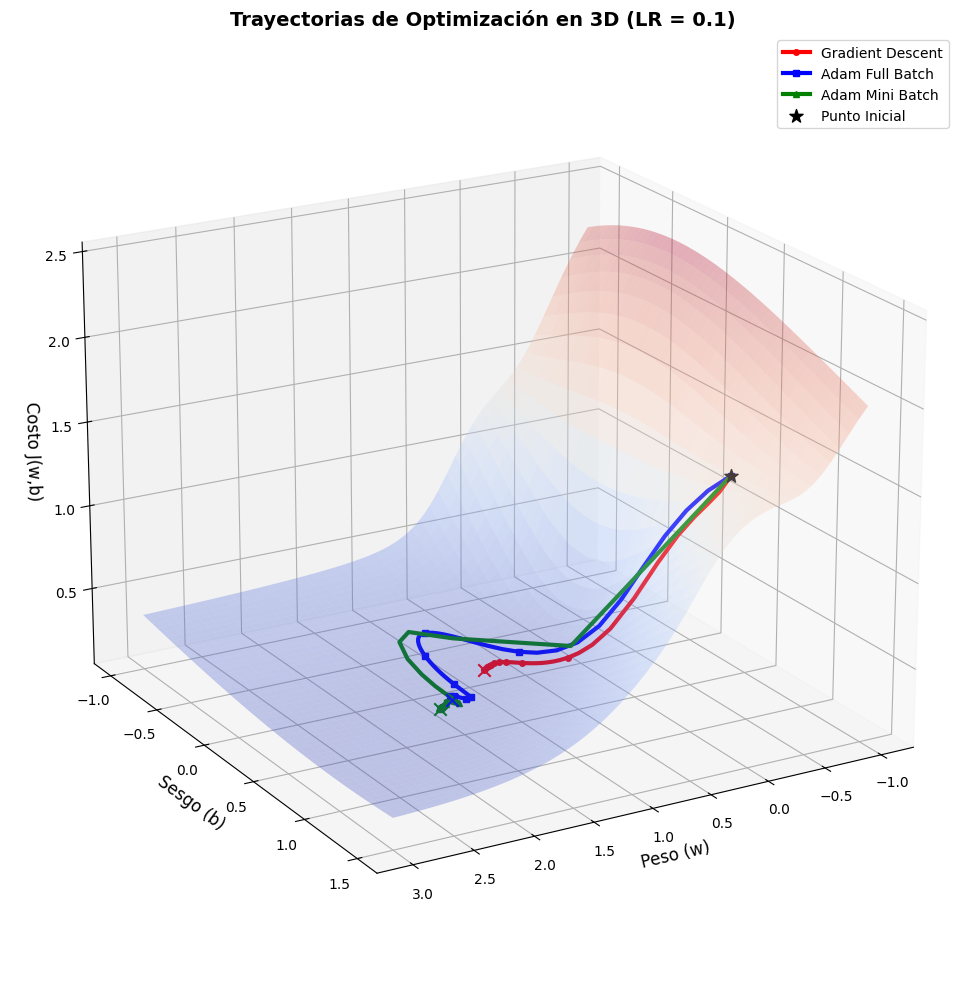

In [ ]:
#1d) 3D Visualization of Learning Trajectories
from mpl_toolkits.mplot3d import Axes3D

# selected learning rate
chosen_lr = 0.1

# meshgrid of J(w,b)
w_vals = np.linspace(-1, 3, 100)
b_vals = np.linspace(-1, 1.5, 100)
W, B = np.meshgrid(w_vals, b_vals)

# cost surface computation
def cost_surface(w_grid, b_grid):
    costs = np.zeros_like(w_grid)
    for i in range(w_grid.shape[0]):
        for j in range(w_grid.shape[1]):
            costs[i,j] = compute_cost(x, y, w_grid[i,j], b_grid[i,j])
    return costs

Z = cost_surface(W, B)

# trajectories extraction
gd_trajectory = gd_results[chosen_lr]
adam_full_trajectory = adam_full_results[chosen_lr] 
adam_mini_trajectory = adam_mini_results[chosen_lr]

gd_w = np.array(gd_trajectory['w_history'])
gd_b = np.array(gd_trajectory['b_history'])
gd_costs = np.array([compute_cost(x, y, w, b) for w, b in zip(gd_w, gd_b)])

adam_full_w = np.array(adam_full_trajectory['w_history'])
adam_full_b = np.array(adam_full_trajectory['b_history'])
adam_full_costs = np.array([compute_cost(x, y, w, b) for w, b in zip(adam_full_w, adam_full_b)])

adam_mini_w = np.array(adam_mini_trajectory['w_history'])
adam_mini_b = np.array(adam_mini_trajectory['b_history'])
adam_mini_costs = np.array([compute_cost(x, y, w, b) for w, b in zip(adam_mini_w, adam_mini_b)])

# 3D visualization
fig = plt.figure(figsize=(14, 10))
ax = fig.add_subplot(111, projection='3d')

surface = ax.plot_surface(W, B, Z, alpha=0.3, cmap='coolwarm', 
                         linewidth=0, antialiased=True)

# trajectories
ax.plot(gd_w, gd_b, gd_costs, 'r-', linewidth=3, label='Gradient Descent', 
        marker='o', markersize=4, markevery=10)
ax.plot(adam_full_w, adam_full_b, adam_full_costs, 'b-', linewidth=3, 
        label='Adam Full Batch', marker='s', markersize=4, markevery=10)
ax.plot(adam_mini_w, adam_mini_b, adam_mini_costs, 'g-', linewidth=3, 
        label='Adam Mini Batch', marker='^', markersize=4, markevery=10)

# initial points
ax.scatter(gd_w[0], gd_b[0], gd_costs[0], color='black', s=100, 
          marker='*', label='Punto Inicial')

# final points
ax.scatter(gd_w[-1], gd_b[-1], gd_costs[-1], color='red', s=80, marker='x')
ax.scatter(adam_full_w[-1], adam_full_b[-1], adam_full_costs[-1], 
          color='blue', s=80, marker='x')
ax.scatter(adam_mini_w[-1], adam_mini_b[-1], adam_mini_costs[-1], 
          color='green', s=80, marker='x')
# labels and title
ax.set_xlabel('Peso (w)', fontsize=12)
ax.set_ylabel('Sesgo (b)', fontsize=12)
ax.set_zlabel('Costo J(w,b)', fontsize=12)
ax.set_title(f'Trayectorias de Optimización en 3D (LR = {chosen_lr})', 
             fontsize=14, fontweight='bold')

# view angle and legend
ax.legend(loc='upper right')
ax.view_init(elev=20, azim=60)

plt.tight_layout()
plt.show()

# **PREGUNTA 2**

Descargar el dataset del siguiente link: https://drive.google.com/file/d/1LOzaL3dgnX4sWSPm49d0YQKeVfCmx3Hq/view?usp=sharing.

El dataset consiste en compras de productos que diferentes clientes realizaron durante un black sales. El dataset contiene información sobre las transacciones, compuestas por un cliente y el producto que adquirió.


### 2a) EDA y preparación del dataset (2.5 puntos)
Realizar el análisis exploratorio del dataset (EDA) con las herramientas vistas en materias anteriores. Pre-procesar y transformar las variables que sean necesarias, analizar qué columnas se deben dropear, cuáles vale la pena hacer un tratamiento de valores nulos, si se debe usar label encoding, one-hot encoding, ordinal encoding o mapping encoding, explicar los criterios utilizados y analizar las distribuciones.

Vamos a tratar este problema como una clasificación donde queremos averiguar si el cliente pertenece a un segmento: "Casual" (gasta menos de 3000), "Gama media" (gasta entre 3000 y 8000), "Gama alta" (gasta entre 8000 y 18000) o a "Premium" (gasta más de 18000), según el producto que adquirió.

Redactar las conclusiones preliminares que pueden notar de cada feature y justificar el porqué de cada encoding aplicado.

**IMPORTANTE: Luego de asignar los segmentos, no se olviden de eliminar la columna "Purchase".**

### 2b) Modelo de deep leaning sin embeddings (1.5 puntos)
Entrenar un modelo de deep learning usando Pytorch que no utilice embeddings, **descartando el `product_id` y `user_id`**. Graficar las evoluciones por época de la función de costo y de métricas como el accuracy y el f1 score para train y validation. Mostrar una matriz de confusión absoluta y otra normalizada por fila. Explicar el proceso de iteracion utilizado para conseguir los resultados y justificar los resultados obtenidos.

Pueden usarse herramientas de regularización y prueba de hiperpametros para conseguir mejores resultados.

Un resultado aceptable sería al menos un 78% de accuracy y f1 score para el set de validation.

### 2c) Modelo de deep leaning con embeddings (2 puntos)
Entrenar un modelo de deep learning usando Pytorch que utilice **2 capas de embeddings**, una para los productos y otra para los usuarios. Graficar las evoluciones por época de la función de costo y de métricas como el accuracy y el f1 score para train y validation. Mostrar una matriz de confusión absoluta y otra normalizada por fila. Explicar el proceso de iteracion utilizado para conseguir los resultados y justificar los resultados obtenidos. Justificar la cantidad de dimensiones usada para los embeddings. **Comparar contra el modelo sin embeddings** y explicar el porqué de los resultados.

Elegir la cantidad justa y necesaria de dimensiones para los embeddings y justificar el porqué.

Pueden usarse herramientas de regularización y prueba de hiperpametros para conseguir mejores resultados.

Un resultado aceptable sería al menos un 90% de accuracy y f1 score para el set de validation.

### 2d) Encontrar usuarios similares (1 punto)
Para el modelo del punto 2c) implementar una función que reciba un ID de usuario y sugiera **n** cantidad de usuarios que tuvieron un comportamiento de compras similar. También se debe mostrar el grado o porcentaje de similitud de cada usuario que retorne la función.